# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label
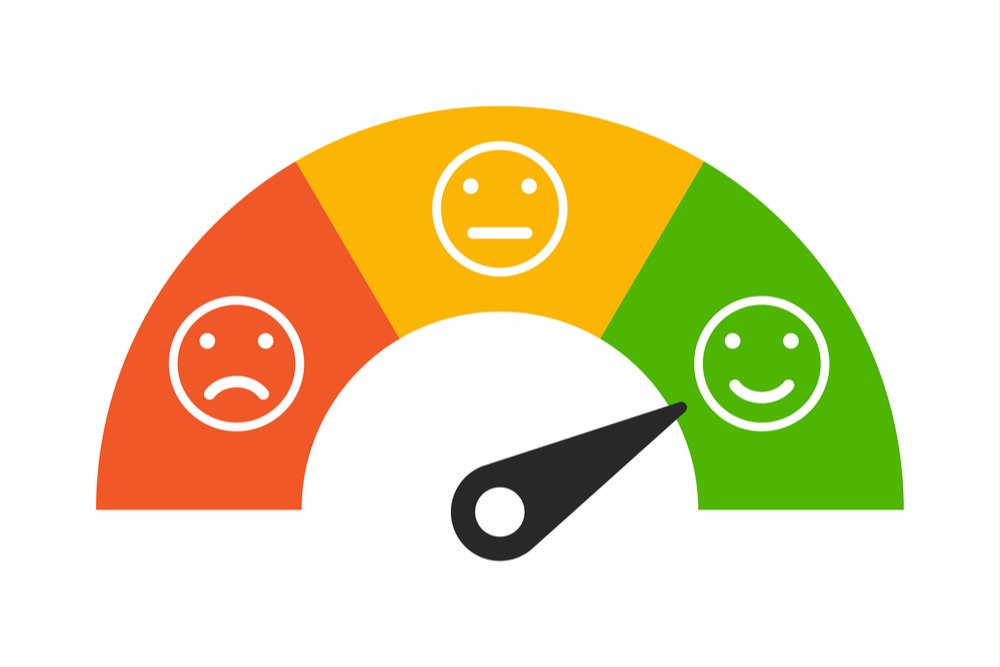

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import *

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Corona tweet Analysis/Data & Resources/Coronavirus Tweets.csv',sep=',',encoding='latin')

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


Only Location column has Null values.

# **EDA**

Lets find out unique values in each column.

In [ ]:
a=[]
b=[]
for col in df.columns:
  a.append(df[col].nunique())
  b.append(col)
  

In [ ]:
d = pd.DataFrame(a,b,columns=['counts'])


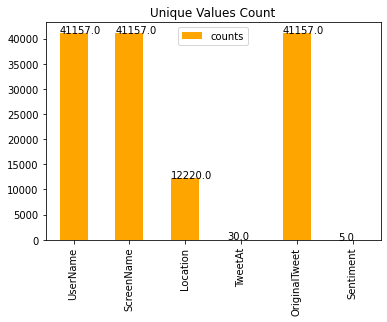

In [ ]:
n=d.plot(kind='bar',color='orange')
plt.title("Unique Values Count")
for p in n.patches:
  n.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))

In data there are 12220 different locations and 30 unique values in TweetAt column means given dataset is of 30 days. 

In [ ]:
# lets count Null Values
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

in Location column 8590 null values.

In [ ]:
# Sentiment count
df.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sentiment count')

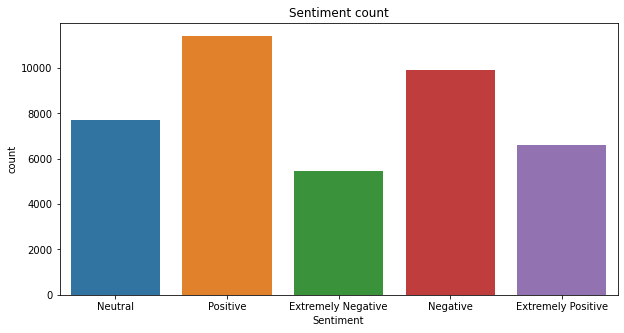

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df['Sentiment'])
plt.title("Sentiment count")

There are five sentiment types Neutral,Positive,Extremely positive,Negative,Extremely Negative. in that count of Positive tweet is highest. 

lets go through each type of sentiment:

In [ ]:
df[df['Sentiment']=='Positive'].loc[3,'OriginalTweet']

"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j"

In [ ]:
df[df['Sentiment']=="Extremely Positive"].loc[11,"OriginalTweet"]


'Due to the Covid-19 situation, we have increased demand for all food products. \r\r\n\r\r\nThe wait time may be longer for all online orders, particularly beef share and freezer packs. \r\r\n\r\r\nWe thank you for your patience during this time.'

In [ ]:
df[df['Sentiment']=="Neutral"].loc[10,"OriginalTweet"]

"All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket. #manila #lockdown #covid2019 #Philippines https://t.co/HxWs9LAnF9"

In [ ]:
df[df['Sentiment']=="Neutral"].loc[16,"OriginalTweet"]

'????? ????? ????? ????? ??\r\r\n?????? ????? ??????? ????????? ?\r\r\n#????_???? ????? ???? ?????? ? #????????? ?????? ?? 13 ???? ?? ?? ???? ?????? ?? ??\r\r\n#???_???????? ????? ??? ???? ? https://t.co/51bL8P6vZh'

In [ ]:
df[df['Sentiment']=="Extremely Negative"].loc[27,"OriginalTweet"]

'This morning I tested positive for Covid 19. I feel ok, I have no symptoms so far but have been isolated since I found out about my possible exposure to the virus.  Stay home people and be pragmatic. I will keep you updated on how IÂ\x92m doing ???? No panic. https://t.co/Lg7HVMZglZ'

In [ ]:
df[df['Sentiment']=="Extremely Negative"].loc[41130,"OriginalTweet"]

'Squeo works in the meat department of a Kroger supermarket in Michigan. He knows of several grocery workers whoÂ\x92ve tested positive for COVID-19 and one in his area who died. He worries that the behavior of some shoppers is putting people in unnecessary danger.'

In [ ]:
df[df['Sentiment']=="Negative"].loc[9,"OriginalTweet"]

"For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our home. It's time to fight against COVID 19?. #govindia #IndiaFightsCorona"

From above tweets we can see that there is no difference in Positive and Extremely Positive tweets or Negative and Extremely Negative Tweets.so we can combine them together as..

positive = extremely positive + positive
negative = extremely negative + negative

and then..
catagories them as 1 for positive,2 for neutral, 3 for negative. 

In [ ]:
df['Sentiment_cat'] = df['Sentiment'].replace({"Positive":3,'Negative':1,'Neutral':2,'Extremely Positive':3,'Extremely Negative':1})

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Sentiment_cat
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,2
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,3
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,3
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,3
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,1


In [ ]:
df.Sentiment_cat.unique()

array([2, 3, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


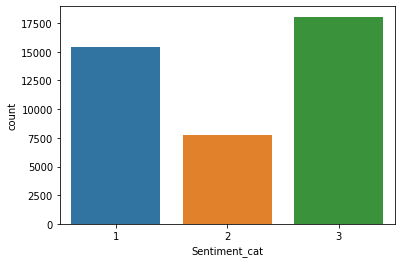

In [ ]:
sns.countplot(df['Sentiment_cat'])

we have given tweets of 1 month..

In [ ]:
df.TweetAt.value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


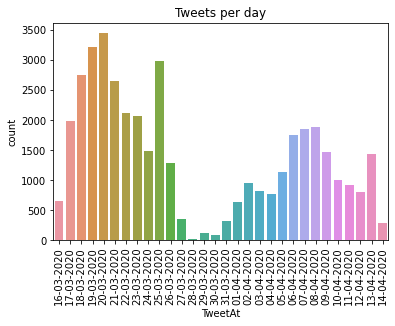

In [ ]:
sns.countplot(df['TweetAt'])
plt.title("Tweets per day")
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (5,5)

most of the tweets are from month March.

In [ ]:
df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


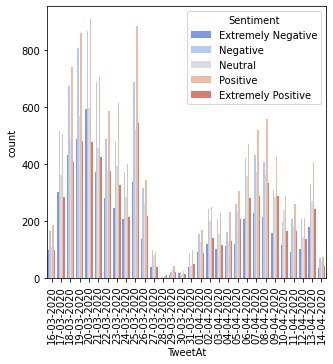

In [ ]:
sns.countplot(df['TweetAt'],hue = df['Sentiment'],hue_order=['Extremely Negative', 'Negative','Neutral', 'Positive','Extremely Positive'],palette = 'coolwarm')
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (25,10)

above plot shows sentiment wise count of tweets per day

In [ ]:
# Locations
df['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [ ]:
# lets find out top 10 locations
top_loc_df = pd.DataFrame(df.Location.value_counts().head(10))

In [ ]:
top_loc_df.reset_index(inplace=True)

top_loc_df.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)


In [ ]:
top_loc_df

,Location,Location_Count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


Maximum tweets are from London

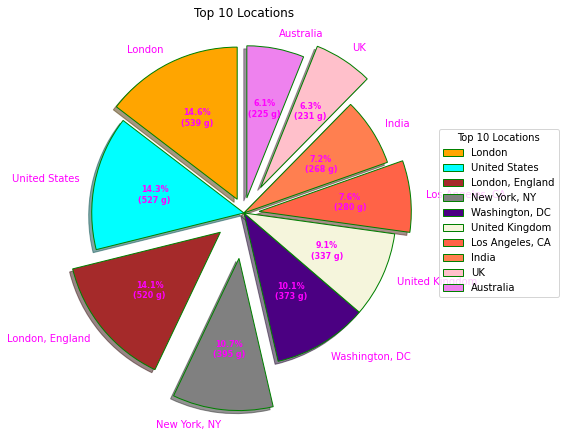

In [ ]:
# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0,0.1,0.0,0.2,0.1)

# Creating color parameters
colors = ( "orange", "cyan", "brown",
		"grey", "indigo", "beige", "tomato","coral", "pink","violet")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autocpt arguments
def func(pct, allvalues):
	absolute = int(pct / 100.*np.sum(allvalues))
	return "{:.1f}%\n({:d} g)".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(top_loc_df['Location_Count'],
								autopct = lambda pct: func(pct, top_loc_df['Location_Count']),
								explode = explode,
								labels = top_loc_df['Location'],
								shadow = True,
								colors = colors,
								startangle = 90,
								wedgeprops = wp,
								textprops = dict(color ="magenta"))

# Adding legend
ax.legend(wedges, top_loc_df['Location'],
		title ="Top 10 Locations",
		loc ="center left",
		bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Top 10 Locations")

# show plot
plt.show()


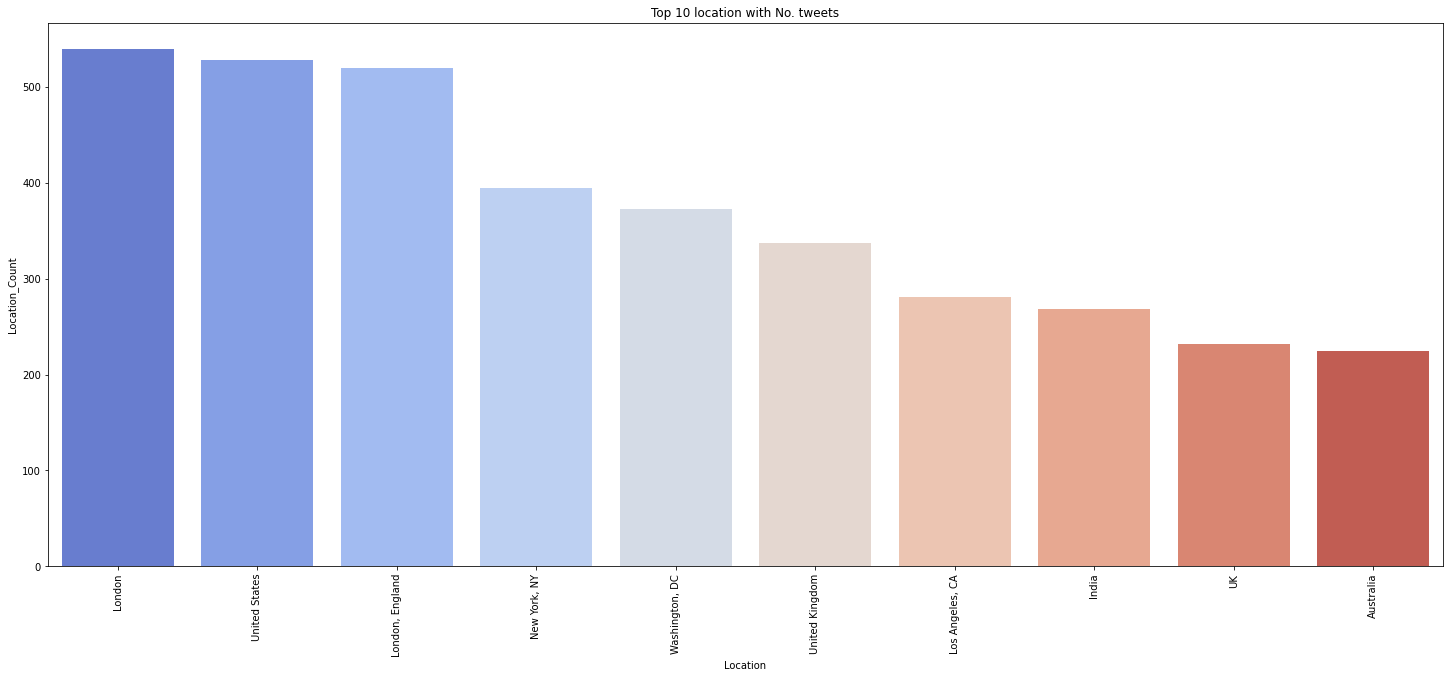

In [ ]:
sns.barplot(x="Location", y="Location_Count", data=top_loc_df,
                 palette='coolwarm')
# sns.set_theme(style="darkgrid")
plt.title("Top 10 location with No. tweets")
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (5,5)

above plot shows top 10 locations which has highest no. of tweets

country wise sentiment analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 720x360 with 0 Axes>

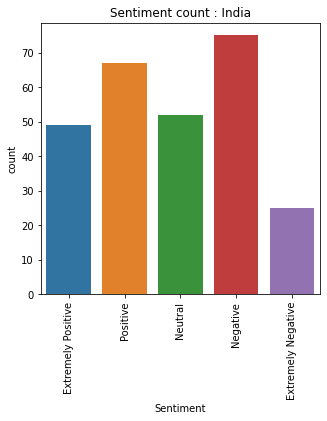

<Figure size 720x360 with 0 Axes>

In [ ]:
sns.countplot(df[df['Location']=="India"]['Sentiment'])
plt.title("Sentiment count : India")
plt.xticks(rotation = 90)
plt.figure(figsize=(10,5))



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 720x360 with 0 Axes>

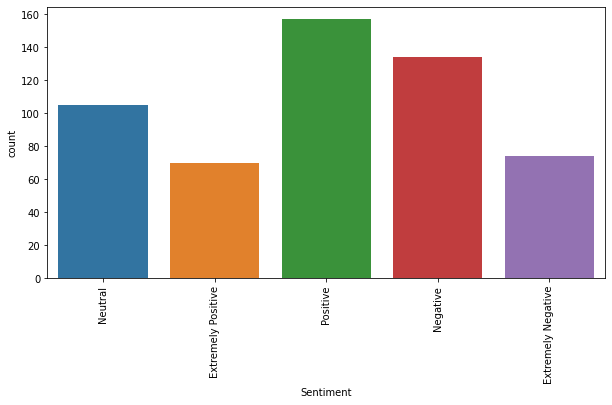

<Figure size 720x360 with 0 Axes>

In [ ]:
sns.countplot(df[df['Location']=="London"]['Sentiment'])
plt.xticks(rotation = 90)
plt.figure(figsize=(10,5))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 720x360 with 0 Axes>

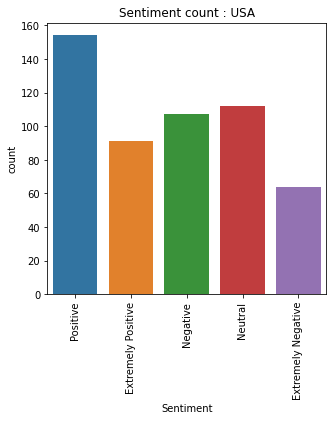

<Figure size 720x360 with 0 Axes>

In [ ]:
sns.countplot(df[df['Location']=="United States"]['Sentiment'])
plt.title("Sentiment count : USA")
plt.xticks(rotation = 90)
plt.figure(figsize=(10,5))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 720x360 with 0 Axes>

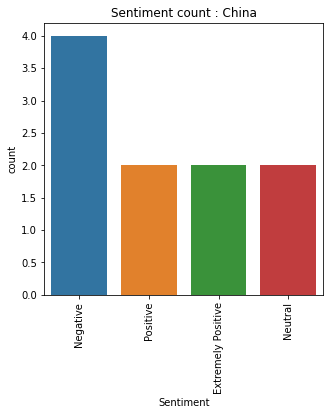

<Figure size 720x360 with 0 Axes>

In [ ]:
sns.countplot(df[df['Location']=="China"]['Sentiment'])
plt.title("Sentiment count : China")
plt.xticks(rotation = 90)
plt.figure(figsize=(10,5))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 720x360 with 0 Axes>

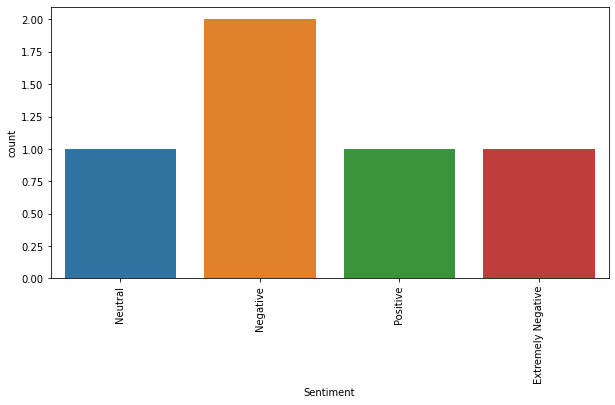

<Figure size 720x360 with 0 Axes>

In [ ]:
sns.countplot(df[df['Location']=="Austria"]['Sentiment'])
plt.xticks(rotation = 90)
plt.figure(figsize=(10,5))

In [ ]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'Sentiment_cat'],
      dtype='object')

In [ ]:
df.loc[4117]

UserName                                                      7916
ScreenName                                                   52868
Location                                                   Calgary
TweetAt                                                 18-03-2020
OriginalTweet    #WestJet is lying. They are NOT lowering price...
Sentiment                                                 Negative
Sentiment_cat                                                    1
hashtags                                   westjet,covid_19,canada
Name: 4117, dtype: object

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Sentiment_cat
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,2
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,3
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,3
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,3
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,1


# **Data Processing and Cleaning**

# Removing User

In [ ]:
df['OriginalTweet'].iloc[4117]

'#WestJet is lying. They are NOT lowering prices to get you out of the country.\r\r\n\r\r\nThese are screen shots for the same flight 2am 12pm 7pm\r\r\n #covid_19 #canada  @GlobalNational @globalnews @GlobalCalgary @CTVNews @CNN @JustinTrudeau https://t.co/pfEQVZVRf6'

In [ ]:
def rem_user(tweet):
  a=[]
  for word in tweet.lower().split():
    if word.startswith('@'):
      continue
    else:
      a.append(word)
  return ' '.join(a)

In [ ]:
df['Tweets'] =df['OriginalTweet'].apply(rem_user) 

In [ ]:
df['Tweets'].iloc[4117]

'#westjet is lying. they are not lowering prices to get you out of the country. these are screen shots for the same flight 2am 12pm 7pm #covid_19 #canada https://t.co/pfeqvzvrf6'

# Removing links

In [ ]:
def rem_links(tweet):
  a=[]
  for word in tweet.lower().split():
    if word.startswith('https:') or word.startswith('http:'):
      continue
    else:
      a.append(word)
  return ' '.join(a)

In [ ]:
df['Tweets'] =df['Tweets'].apply(rem_links) 

In [ ]:
df['Tweets'].iloc[4117]

'#westjet is lying. they are not lowering prices to get you out of the country. these are screen shots for the same flight 2am 12pm 7pm #covid_19 #canada'

# Removing digits and special characters

In [ ]:
import re
def rm_dig(tweet):
  a=[]
  for word in tweet.split():
    output = re.sub('[â£/0-9]+', '', word)
    a.append(output)
  return ' '.join(a)

In [ ]:
df['Tweets'] =df['Tweets'].apply(rm_dig) 

In [ ]:
df['Tweets'].iloc[4117]

'#westjet is lying. they are not lowering prices to get you out of the country. these are screen shots for the same flight am pm pm #covid_ #canada'

# Removing stopwords and Punctuations

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import string
from nltk.corpus import stopwords

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [ ]:
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
df['Tweets'] = df['Tweets'].apply(text_process)

In [ ]:
df['Tweets'].iloc[4117]

'westjet lying lowering prices get country screen shots flight pm pm covid canada'

# Stemming

In [ ]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
     return " ".join([stemmer.stem(word) for word in text.split()])

df['Tweets']=df['Tweets'].apply(stem_words)


In [ ]:
df['Tweets'].iloc[4117]

'westjet lie lower price get countri screen shot flight pm pm covid canada'

# Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

In [ ]:
df['Tweets']=df['Tweets'].apply(lemmatize_words)

In [ ]:
df['Tweets'].iloc[4117]

'westjet lie low price get countri screen shot flight pm pm covid canada'

In [ ]:
df['OriginalTweet'].iloc[4117]

'#WestJet is lying. They are NOT lowering prices to get you out of the country.\r\r\n\r\r\nThese are screen shots for the same flight 2am 12pm 7pm\r\r\n #covid_19 #canada  @GlobalNational @globalnews @GlobalCalgary @CTVNews @CNN @JustinTrudeau https://t.co/pfEQVZVRf6'

# Analyzing Hashtags

In [ ]:
def get_tags(tweet):
  stri = ''
  for word in tweet.lower().split():
    if word.startswith("#"):
      stri+=word[1:]+','
  return stri[:-1]

In [ ]:
df['hashtags'] = df['OriginalTweet'].apply(get_tags)

In [ ]:
df["OriginalTweet"].iloc[25]

"UK #consumer poll indicates the majority expect #covid19's impact to last 4-12 months (at 12 March). We expect this to increase at the next #tracker... See full results of the @RetailX Coronavirus Consumer Confidence Tracker here: https://t.co/K3uJlcjqDB https://t.co/9G3kgqIXJ8"

In [ ]:
df['Tweets'].iloc[25]

'uk consum poll indic major expect covid impact last month march expect increas next tracker see full result coronaviru consum confid tracker'

In [ ]:
df['hashtags'].iloc[25]

"consumer,covid19's,tracker..."

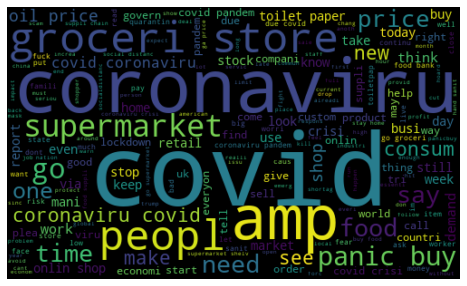

In [ ]:
all_Words = ' '.join([twts for twts in df['Tweets'][df['Sentiment_cat']==1]])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_Words)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

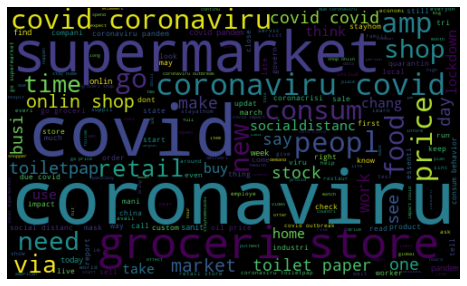

In [ ]:
all_Words = ' '.join([twts for twts in df['Tweets'][df['Sentiment_cat']==2]])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_Words)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

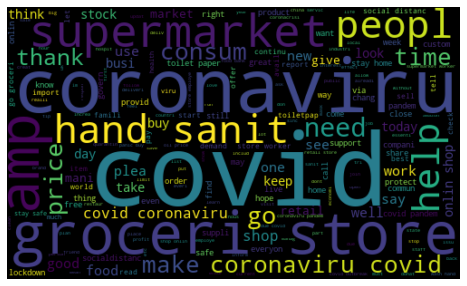

In [ ]:
all_Words = ' '.join([twts for twts in df['Tweets'][df['Sentiment_cat']==3]])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_Words)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df.loc[2235]

UserName                                                      6034
ScreenName                                                   50986
Location                                       Birmingham, England
TweetAt                                                 17-03-2020
OriginalTweet    Finally, an online shopping substitution that ...
Sentiment                                                 Positive
Sentiment_cat                                                    3
Tweets           final onlin shop substitut make sen andrex cla...
hashtags         covid19,coronavirus,dontbuythesun,workingfromhome
Name: 2235, dtype: object

In [ ]:
df['hashtags'].value_counts()

                                                          17541
coronavirus                                                2991
covid_19                                                    668
covid2019                                                   391
coronavirus,covid19                                         308
                                                          ...  
coronavirus,gopinsidertrading,trumplies                       1
lesson,toiletpaper,coronavirus,virus,toilet,meme,memes        1
covid_19,silverlinings                                        1
traderjoes.,coronavirus:                                      1
coronavirus,covid19,coronavirus                               1
Name: hashtags, Length: 15660, dtype: int64

# **Model Training (for Multiclass Classification)**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train,test = train_test_split(df,test_size = 0.2,random_state=0,stratify = df.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("test shape : ", test.shape)

train shape :  (32925, 9)
test shape :  (8232, 9)


# **Counter Vectorizer For Multi Class Classification**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweets.values)
X_test = vectorizer.transform(test.Tweets.values)

y_train = train.Sentiment.values
y_test = test.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (32925, 33214)
X_test.shape :  (8232, 33214)
y_train.shape :  (32925,)
y_test.shape :  (8232,)


In [ ]:
X_train.toarray()[1]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_train

array(['Neutral', 'Neutral', 'Extremely Negative', ..., 'Neutral',
       'Positive', 'Neutral'], dtype=object)

In [ ]:
y_test

array(['Negative', 'Positive', 'Negative', ..., 'Positive', 'Positive',
       'Negative'], dtype=object)

# **Naive Bayes Classifier for MULTICLASS Classification**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

y_pred = naiveByes_clf.predict(X_test)


In [ ]:
train_accuracy = naiveByes_clf.score(X_train,y_train)
print("training accuracy Score    : ",train_accuracy)

NB_accuracy = accuracy_score(y_test,y_pred)
print("test accuracy Score : ",NB_accuracy )


print(classification_report(y_pred,y_test))

training accuracy Score    :  0.7047228549734245
test accuracy Score :  0.4686588921282799
                    precision    recall  f1-score   support

Extremely Negative       0.34      0.58      0.43       642
Extremely Positive       0.37      0.60      0.46       818
          Negative       0.53      0.42      0.47      2459
           Neutral       0.33      0.66      0.44       765
          Positive       0.63      0.41      0.50      3548

          accuracy                           0.47      8232
         macro avg       0.44      0.53      0.46      8232
      weighted avg       0.52      0.47      0.47      8232



# **Stochastic Gradient Descent-SGD Classifier( MULTICLASS CLASSIFICATION)**

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=0)

In [ ]:
sgd_prediction = sgd_clf.predict(X_test)

print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))

sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Validation accuracy Score : ",sgd_accuracy )

print(classification_report(sgd_prediction,y_test))

Training accuracy Score    :  0.8457706909643128
Validation accuracy Score :  0.5638969873663752
                    precision    recall  f1-score   support

Extremely Negative       0.69      0.59      0.64      1278
Extremely Positive       0.70      0.65      0.67      1431
          Negative       0.42      0.49      0.46      1699
           Neutral       0.75      0.58      0.65      1994
          Positive       0.42      0.53      0.47      1830

          accuracy                           0.56      8232
         macro avg       0.60      0.57      0.58      8232
      weighted avg       0.59      0.56      0.57      8232



# **RANDOM FOREST CLASSIFIER (For Multiclass Classification)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_test)


In [ ]:
rf_accuracy = accuracy_score(y_test,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  0.9997266514806378
Validation accuracy Score :  0.5634110787172012
                    precision    recall  f1-score   support

Extremely Negative       0.38      0.70      0.49       584
Extremely Positive       0.34      0.71      0.46       637
          Negative       0.54      0.51      0.53      2102
           Neutral       0.78      0.63      0.69      1899
          Positive       0.66      0.50      0.57      3010

          accuracy                           0.56      8232
         macro avg       0.54      0.61      0.55      8232
      weighted avg       0.61      0.56      0.57      8232



# **Extreme Gradient Boosting ( For Multiclass Classification)**

In [ ]:
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_test))

Training accuracy Score    :  0.5088230827638572
Validation accuracy Score :  0.49076773566569487
                    precision    recall  f1-score   support

Extremely Negative       0.38      0.63      0.47       663
Extremely Positive       0.43      0.67      0.52       852
          Negative       0.37      0.50      0.42      1455
           Neutral       0.64      0.47      0.54      2134
          Positive       0.58      0.43      0.49      3128

          accuracy                           0.49      8232
         macro avg       0.48      0.54      0.49      8232
      weighted avg       0.53      0.49      0.49      8232



# **Support vector machine( For Multiclass Classification)**

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_test))

Training accuracy Score    :  0.9074259681093394
Validation accuracy Score :  0.607871720116618
                    precision    recall  f1-score   support

Extremely Negative       0.50      0.73      0.59       747
Extremely Positive       0.54      0.77      0.63       926
          Negative       0.57      0.55      0.56      2060
           Neutral       0.70      0.65      0.67      1674
          Positive       0.67      0.54      0.60      2825

          accuracy                           0.61      8232
         macro avg       0.60      0.65      0.61      8232
      weighted avg       0.62      0.61      0.61      8232



# **Logistic Regression(For Multiclass Classification)**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Training accuracy Score    :  0.9063933181473045
Validation accuracy Score :  0.6134596695821186
                    precision    recall  f1-score   support

Extremely Negative       0.62      0.68      0.65       998
Extremely Positive       0.62      0.71      0.66      1143
          Negative       0.55      0.56      0.55      1922
           Neutral       0.71      0.63      0.67      1722
          Positive       0.61      0.57      0.58      2447

          accuracy                           0.61      8232
         macro avg       0.62      0.63      0.62      8232
      weighted avg       0.62      0.61      0.61      8232



# **CATBOOST MODEL (For Multiclass Classification)**

In [ ]:
!pip install catboost
!pip install ipywidgets


     |████████████████████████████████| 76.1 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

In [ ]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,  
        eval_set=(X_test, y_test), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


In [ ]:
catboost_prediction = clf2.predict(X_test)
catboost_accuracy = accuracy_score(y_test,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_test))

Training accuracy Score    :  0.6662718299164768
Validation accuracy Score :  0.6222060252672498
                    precision    recall  f1-score   support

Extremely Negative       0.55      0.70      0.61       859
Extremely Positive       0.57      0.77      0.65       979
          Negative       0.53      0.58      0.56      1813
           Neutral       0.80      0.61      0.69      2036
          Positive       0.64      0.58      0.61      2545

          accuracy                           0.62      8232
         macro avg       0.62      0.65      0.63      8232
      weighted avg       0.64      0.62      0.62      8232



# **Result of Multiclass Classification**

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy,catboost_accuracy]})
models.reset_index(inplace=True)
models.sort_values(by='Test accuracy', ascending=False)

,index,Model,Test accuracy
6,6,CatBoost,0.622206
1,1,Logistic Regression,0.613460
0,0,Support Vector Machines,0.607872
4,4,Stochastic Gradient Decent,0.563897
2,2,Random Forest,0.563411
5,5,XGBoost,0.490768
3,3,Naive Bayes,0.468659


# **CONVRTING MULTICLASS CLASSIFICATION INTO BINARY CLASSIFICATION**

In [ ]:
new_df = df[['Tweets','Sentiment']]

In [ ]:
new_df

,Tweets,Sentiment
0,,Neutral
1,advic talk neighbour famili exchang phone numb...,Positive
2,coronaviru australia woolworth give elderli di...,Positive
3,food stock one empti plea dont panic enough fo...,Positive
4,readi go supermarket covid outbreak im paranoi...,Extremely Negative
...,...,...
41152,airlin pilot offer stock supermarket shelv nz ...,Neutral
41153,respons complaint provid cite covid relat dela...,Extremely Negative
41154,know it get tough ration toilet paper coronav...,Positive
41155,wrong smell hand sanit start turn coronaviru c...,Neutral


In [ ]:
new_df=new_df[new_df['Sentiment']!="Neutral"]

In [ ]:
new_df['Sentiment'] = new_df['Sentiment'].replace({'Positive':1,'Extremely Positive':1,'Negative':0,'Extremely Negative':0})

In [ ]:
new_df

,Tweets,Sentiment
1,advic talk neighbour famili exchang phone numb...,1
2,coronaviru australia woolworth give elderli di...,1
3,food stock one empti plea dont panic enough fo...,1
4,readi go supermarket covid outbreak im paranoi...,0
5,news region first confirm covid case come sul...,1
...,...,...
41150,never wed situat amp world go supermarket pic...,1
41151,definit man feel like fall need honor hero cov...,1
41153,respons complaint provid cite covid relat dela...,0
41154,know it get tough ration toilet paper coronav...,1


# **Model Training**

In [ ]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(new_df,test_size = 0.2,random_state=0,stratify = new_df.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("test shape : ", test.shape)

train shape :  (26755, 2)
test shape :  (6689, 2)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweets.values)
X_test = vectorizer.transform(test.Tweets.values)

y_train = train.Sentiment.values
y_test = test.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (26755, 29133)
X_test.shape :  (6689, 29133)
y_train.shape :  (26755,)
y_test.shape :  (6689,)


# **NAIVE BAYES CLASSIFIER FOR BINARY CLASSIFICATION.**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

training accuracy Score    :  0.8757615398990842
Validation accuracy Score :  0.8040065779638212
              precision    recall  f1-score   support

           0       0.78      0.79      0.78      3007
           1       0.83      0.81      0.82      3682

    accuracy                           0.80      6689
   macro avg       0.80      0.80      0.80      6689
weighted avg       0.80      0.80      0.80      6689



# **RANDOM FOREST CLASSIFIER FOR BINARY CLASSIFICATION**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  0.9999626238086339
Validation accuracy Score :  0.8358499028255345
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      2916
           1       0.87      0.83      0.85      3773

    accuracy                           0.84      6689
   macro avg       0.83      0.84      0.83      6689
weighted avg       0.84      0.84      0.84      6689



# **LOGISTIC REGRESSION(BINARY CLASSIFICATION)**

In [ ]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.9593347037936835
Validation accuracy Score :  0.8757661832859919
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      3025
           1       0.89      0.88      0.89      3664

    accuracy                           0.88      6689
   macro avg       0.87      0.88      0.87      6689
weighted avg       0.88      0.88      0.88      6689



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# **CATBOOST ALGORITHM FOR BINARY CLASSIFICATION**

In [ ]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,  
        eval_set=(X_test, y_test), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


In [ ]:
catboost_prediction = clf2.predict(X_test)
catboost_accuracy = accuracy_score(y_test,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_test))

Training accuracy Score    :  0.9088394692580826
Validation accuracy Score :  0.872925698908656
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2940
           1       0.90      0.87      0.88      3749

    accuracy                           0.87      6689
   macro avg       0.87      0.87      0.87      6689
weighted avg       0.87      0.87      0.87      6689



# **XG BOOST( BINARY CLASSIFICATION)**

In [ ]:
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_test))

Training accuracy Score    :  0.7544010465333583
Validation accuracy Score :  0.7573628345044102
              precision    recall  f1-score   support

           0       0.63      0.80      0.70      2409
           1       0.87      0.73      0.79      4280

    accuracy                           0.76      6689
   macro avg       0.75      0.77      0.75      6689
weighted avg       0.78      0.76      0.76      6689



# **SUPPORT VECTOR MACHINE(BINARY CLASSIFICATION)**

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_test))

Training accuracy Score    :  0.9726406279200149
Validation accuracy Score :  0.8596202720885036
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      3007
           1       0.88      0.86      0.87      3682

    accuracy                           0.86      6689
   macro avg       0.86      0.86      0.86      6689
weighted avg       0.86      0.86      0.86      6689



# **Stochastic Gradient Descent-SGD Classifier( BINARY CLASSIFICATION)**

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_test))

Training accuracy Score    :  0.9604559895346664
Validation accuracy Score :  0.872626700553147
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3072
           1       0.88      0.88      0.88      3617

    accuracy                           0.87      6689
   macro avg       0.87      0.87      0.87      6689
weighted avg       0.87      0.87      0.87      6689



In [ ]:
train_class_preds = sgd_clf.predict(X_train)
test_class_preds = sgd_clf.predict(X_test)

[[11785   533]
 [  525 13912]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

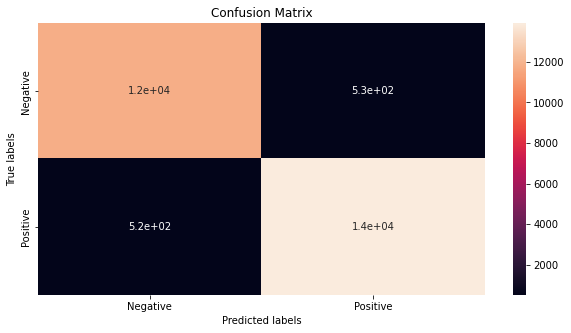

In [ ]:
# Get the confusion matrix for both train and test. We are getting very low type and type 2 errors.

labels = ['Negative', 'Positive']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **EVALUATION OF ALL BINARY CLASSIFICATION MODELS**

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy,catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)


,Model,Test accuracy
1,Logistic Regression,0.875766
6,CatBoost,0.872926
4,Stochastic Gradient Decent,0.872627
0,Support Vector Machines,0.859620
2,Random Forest,0.835850
3,Naive Bayes,0.804007
5,XGBoost,0.757363


# **Conlusion**

* For multiclass classification, the best model for this dataset would be CatBoost which gives highest accuracy 62%.
*For binary classification, the best model for this dataset would be Logistic Regression which gives highest accuracy 87%.